In [12]:
import svmMLiA

In [3]:
dataArr, labelArr = svmMLiA.loadDataSet('testSet.txt')
labelArr[:10]

[-1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0]

SVM对数据点$x_i$的预测值为：  
$$
f(x_i) = (\sum_{i=1}^{M}a_iy_i) \cdot K<x, x_i> + b \tag{1}
$$
记$E_i$为SVM预测值与真实值的误差：  
$$
E_i = f(x_i) - y_i \tag{2}
$$
公式（2）对应的函数为：
```python
def E(dataMat, labelMat, alphas, i, b)
```

目标函数：

$$
W(a) = \sum_{i=1}^{M}a - \frac{1}{2}\sum_{i,j=1}^{M}y_iy_ja_ia_jK_{i,j} \tag{3} \\
$$
约束条件：

$$
0 \le a \le C \tag {4}
$$
$$
\sum_{i=1}^{M}a_iy_i = 0 \tag {5} 
$$

假设现在要更新的是$a_1$和$a_2$,即代码中的I和J，其它alpha都当作常数  
根据约束条件$\sum_{i=1}^M a_iy_i =0$可以得到a_1和a_2的关系：  
$$
a_1y_1 + a_2y_2 = - \sum_{i=3}^{M}a_iy_i = \zeta \tag{6}
$$
公式（6）左边两边同时乘以$y_1$，得：  
$$
a_1 = \zeta y_1 - a_2y_2y_1 \tag{7}
$$
其中$\zeta$代表一个常数。  
目标函数（3）中也把变量$a_1$、$a_2$和常量其它$a$分开，则写成  
$$
W(a_1, a_2) = a_1 + a_2 - \frac{1}{2}K_{1,1}y_1^2a_1^2 - \frac{1}{2}K_{2,2}y_2^2a_2^2 - K_{1,2}y_1y_2a_1a_2 - y_1a_1\sum_{i=3}^{M}a_iy_iK_{i,1} - y_2a_2\sum_{i=3}^{M}a_iy_iK_{i,2} + C\tag {8}
$$
其中$C$是一个与$a_1$、$a_2$无关的常数  
把公式（7）代码公式（8）中，同时为了简单公式（8）的写法，令：  
$$
v_1 = \sum_{i=3}^{M}a_iy_iK_{i,1} \\
v_2 = \sum_{i=3}^{M}a_iy_iK_{i,2} \tag {9}
$$
最终公式（8）变成了公式（10）  
$$
W(a_2) = - \frac{1}{2}K_{1,1}(\zeta - a_2y_2)^2 - \frac{1}{2}K_{2,2}a_2^2 - y_2(\zeta-a_2y_2)a_2K_{1,2} - v_1(\zeta-a_2y_2)-v_2y_2a_2+a_1+a_2+C \tag{10}
$$
公式（10）$W(a_2)$在其一阶层数为0的位置取得最大值点。因此$\frac{\partial W(a_2)}{\partial a_2}=0$得到的$a_2$为新的$a_2$值
$$
\frac{\partial W(a_2)}{\partial a_2} = -(K_{1,1}+K_{2,2}-2K{1,2})a_2^{new} + K{1,1}\zeta y_2 - K_{1,2}\zeta y_2 + v_1y_2 - v_2y_2 - y_1y_2 +y_2^2 = 0 \tag{11}
$$
公式（11）已经能解出a_2^{new}了，但这样的计算很不方便，可以把公式（11）中不包含$a_2^{new}$的项用$a_2^{old}$来表达。具体方法是将公式(1)(2)(7)代入公式（11）中，并令$\eta = - K_{1,1} - K_{2,2} + 2K_{1,2}$
公式$\eta$对应的代码为：  
```python
def calc_eta(I, J)
```

得到最终的一阶导数表达式   

$$
\frac{\partial W(a_2)}{\partial a_2} = \eta a_2^{new} - \eta a_2^{old} + y_2(E_1 - E_2) = 0 \tag{12}
$$
得到  

$$
a_2^{new} = a_2^{old} - \frac{y_2(E_1-E_2)}{\eta} \tag{13}
$$
公式（13）对应的代码为：
```python
def update_alpha_j(I, J, C)
```

公式（13）计算出来的$a_2^{new}$没有考虑边界，根据公式（6）和（4）可以计算出$a_2^{new}$的边界如图：
![](https://img-blog.csdn.net/20180727105736824?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTE3MzQxNDQ=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)
当$y_1 \neq y_2$时，
$$\begin{cases}
L = max(0, a_2^{old} - a_1^{old}) \\
H = min(C, C + a_2^{old} - a_1^{old})\\
\end{cases} \tag {14}
$$
当$y_1 = y_2$时，
$$\begin{cases}
L = max(0, a_2^{old} + a_1^{old} - C) \\
H = min(C, a_2^{old} + a_1^{old}) \\
\end{cases} \tag {15}
$$
公式（14）（15）对应的代码为：
```python
def calcLH(C, I, J)
```

更新完$a_2$以后，根据公式2计算出新的$a_1$  
由于$a$的更新不会影响$\zeta y_1$，得出：

$$
a_1^{new} = a_1^{old} + y_1y_2(a_2^{old} - a_2^{new}) \tag {16}
$$
公式（14）对应的代码为
```python
def update_alpha_i(I, J)
```

更新完一对$a_1$、$a_2$之后，b也要相应的更新  
当 $a_1^{new}$不在边界上，即 $0<a_1^{new}≤C$ ，根据KTT条件可知相应的数据点为支撑向量  
当b_1和b_2都有效的时候它们是相等的，即$b^{new} = b_1^{new} = b_2^{new}$  
但当$a_1$、$a_2$都在边界上且$L \neq H$时，$b_1$、$b_2$之间的值就是和KTT条件一致的阈值。  
SMO选择它们的中点作为新的阈值，即  
$$
b^{new} = \frac{b_1^{new} + b_2^{new}}{2}
$$
更新b对应的代码为：
```python
def update_b(I, J, C, b)
```

当$a_1^{new}$不在边界上，即$0 \lt a_1^{new} \le C$，根据KTT条件可知相应的数据点为支撑向量  
判断是否在边界上对应的代码为：
```python
def isInBound(I, C)
```

如果$a_1^{new}$不在边界上，可知相应的数据点为支撑向量，满足$y_1(w^T+b) = 1$，两边同时乘以$y_1$，得到：  

$$
\sum_{i=1}^{M}a_iy_iK_{i,1}+b=y_1  \tag {17}
$$
进而得到$b_1$的值：  

$$
b_1^{new} = y_1 - \sum_{i=3}^{M}a_iy_iK_{i,1} - a_1^{new}y_1K_{1,1} - a_2^{new}y_2K_{2,1} \tag {18}
$$
其中前两项可以写成：  

$$
y_1 - \sum_{i=3}^{M}a_iy_iK_{i,1} = -E_1 + a_1^{old}y_1K_{1,1} + a_2^{old}y_1K_{2,1} + b_old \tag {19}
$$
合并公式（18）、（19）可推出：

$$
b_1^{new} = -E_1 - y_1K_{1,1}(a_1^{new}-a_1^{old}) - y_2K_{2,1}(a_2^{new}-a_2^{old}) + b^{old} \tag {20}
$$
公式（18）对应的代码为
```python
def calc_b_gap(I, J, target)
```

In [3]:
%%time
b,alphas = svmMLiA.smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

-1.4989951159151231 -1.4989951159151231
iter: 0, i: 0, pairs changed 1
error not big enough
error not big enough
L==H
L==H
-1.5318788945264408 -1.5318788945264408
iter: 0, i: 5, pairs changed 2
L==H
L==H
-2.004037089628741 -2.004037089628741
iter: 0, i: 8, pairs changed 3
error not big enough
L==H
L==H
-2.1746028059070164 -2.1746028059070164
iter: 0, i: 12, pairs changed 4
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
L==H
error not big enough
error not big enough
error not big enough
error not big enough
L==H
J not moving enough
error not big enough
L==H
error not big enough
error not big enough
J not moving enough
L==H
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
-2.1927926956986763 -2.192792695698676
iter: 0, i: 39, pairs changed 5
error not big enough
error not big enough
error not big enough
error not 

error not big enough
-4.151039999388058 -5.188903143932313
iter: 0, i: 69, pairs changed 1
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 0
J not moving enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not

J not moving enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
-3.865187574661675 -3.517318552707581
iter: 1, i: 69, pairs changed 1
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 0
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enou

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 0
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big eno

J not moving enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 6
J not moving enoug

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 2
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big eno

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big eno

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big eno

J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big eno

error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration numbe

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 1
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 1
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 0
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big 

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 14
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 20
error not big enough
error not big 

error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 1
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 7
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 13
error not big enough
error not big enough
error not big enough
error not big

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 19
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 24
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
-3.7378355726647254 -3.7378355726647254
iter: 24, i: 29, pairs changed 1
erro

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 5
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 11
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 0
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big 

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 13
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 3
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big eno

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
L==H
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 11
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
L==H
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not b

error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big eno

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 4
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 12
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big 

error not big enough
iteration number: 1
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 19
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 26
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big 

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 32
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving en

In [4]:
b

-3.8331322667419534

In [5]:
alphas[alphas>0]  

matrix([[1.27450180e-01, 6.93889390e-18, 2.41039451e-01, 2.08166817e-17,
         3.68489631e-01]])

In [6]:
# 打印支撑向量
for i in range(100):
    if alphas[i]>1e-3: print( dataArr[i],labelArr[i])

[4.658191, 3.507396] -1.0
[3.457096, -0.082216] -1.0
[6.080573, 0.418886] 1.0


[ 0.8136443 -0.2728458] -3.8331322667419534


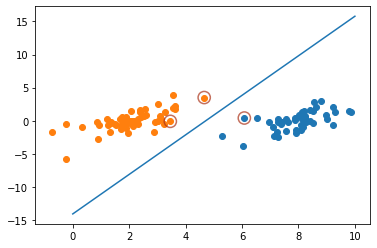

In [7]:
svmMLiA.showSimpleSMO(dataArr, labelArr, alphas, b)

In [41]:
import numpy as np
class optStruct:
    def __init__(self, dataMatIn, classLabels, C, toler):
        self.X = np.mat(dataMatIn)
        self.labelMat = np.mat(classLabels).transpose()
        self.C = C
        self.toler = toler
        self.m= np.shape(self.X)[0]
        self.alphas = np.mat(np.zeros((self.m, 1)))# 把所有alpha都初始化为0
        self.b = 0
        self.eCache = np.mat(np.zeros((self.m, 2))) # m*2, [i,0]代表[i,1]值是否有效。[i,1]代表E_i

# 相当于上面的def E(dataMat, labelMat, alphas, i, b)
def calcEk(oS, k):
     # fx: the predition of the class
    fXi = float(np.multiply(oS.alphas, oS.labelMat).T*(oS.X*oS.X[k,:].T)) + oS.b
    # E: error between predition class and real class
    Ei = fXi - oS.labelMat[k]
    return Ei

# 类似于前面的def selectJrand(i, m):
def selectJ(i, oS, Ei):
    maxj,maxEj,maxDeltaE = 0, 0, -1
    oS.eCache[i] = [1, Ei]
    validEcacheList = np.nonzero(oS.eCache.A[:, 0])
    if len(validEcacheList) > 1: # len至少为1，因为至少eCache[i]=1。但如果len=1，说明这是第一次运行，只有eCache[i]是有效的。
        for j in validEcacheList:
            Ej = calcEk(oS, j)
            # choose the second alpha so that we’ll take the maximum step during each optimization
            if abs(Ej-Ei) > maxEj:  # 
                maxk, maxEj, maxDeltaE = j, Ej, abs(Ej-Ei)
    else:
        maxj = svmMLiA.selectJrand(i, oS.m)
        maxEj = calcEk(oS, maxj)
    return maxj, maxEj

def updateEk(oS, k):
    oS.eCache[k] = [1, calcEk(oS, k)]

In [105]:
def choose_2(oS, I):
    return ((I['y']*I['E'] < - oS.toler) and (I['a'] < oS.C)) or ((I['y']*I['E'] > oS.toler) and (I['a'] > 0))

def generateNode_2(oS, index):
    return {'index':index, # 更新第几个alpha
             'x':oS.X[index,:], # 对应的数据
             'y':oS.labelMat[index],     # 对应的标签
             'a':oS.alphas[index],       # 当前的alpha值
            #E: error between predition class and real class
            # 基于当前alpha对第index个数据的预测分类与该数据的真实分类做比较
             'E':calcEk(oS, index)
           }

def generateI_2(oS, i):
    # 如果这一轮要更新alpha_i，先把alpha_i对应的样本信息都准备好
    I = generateNode_2(oS, i)
    # condition to choose i: error is big enough
    if(not choose_2(oS, I)):
        raise UserWarning('error not big enough')
    return I

def generateJ_2(oS, I):
    # select j randomly
    j,_ = selectJ(I['index'], oS, I['E'])
    return generateNode_2(oS, j)

def updateEk_2(oS, K):
    k = K['index']
    oS.alphas[k] = K['a']
    oS.eCache[k] = [1, calcEk(oS, k)]
    
# 更新alpha_i, alpha_j和b，使得目标函数进一步变大
def update_2(oS, I, J):
    # 根据公式先更新alpha_j
    svmMLiA.update_alpha_j(I, J, oS.C)
    updateEk_2(oS, J)
    # change alpha_i as alpha_j changed
    svmMLiA.update_alpha_i(I, J)
    updateEk_2(oS, I)
    # 当更新了一对a_i,a_j之后，需要重新计算b。
    oS.b = svmMLiA.update_b(I, J, oS.C, oS.b)
    print(I['a'], J['a'], oS.b)
    #return I['a'], J['a'], oS.b

def innerL(i, oS):
    try:
        I = generateI_2(oS, i)
        J = generateJ_2(oS, I)
        update_2(oS, I, J)
    except UserWarning as err:
        print (err)    # 打印报错的字符串
        return 0
    return 1

def smoP(dataMatIn, classLabels, C, toler, maxIter):
    oS = optStruct(dataMatIn, classLabels, C, toler)
    iter = 0
    entireSet, alphaPairsChanged = True, 0
    while (iter < maxIter) and ((alphaPairsChanged > 0)or(entireSet==True)):
        iter += 1
        l = np.arange(oS.m)
        if not entireSet:
            l = l[np.array(oS.alphas.A[:,0]>0) & np.array(oS.alphas.A[:,0]<C)]  # oS.alphas.A[:,0]为什么是list不是array?
        for i in l:
            alphaPairsChanged += innerL(i, oS)
        print ("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if entireSet == True:
            entireSet = False
        elif alphaPairsChanged == 0:
            if entireSet == False:
                entireSet = True
    return oS         

In [106]:
dataArr,labelArr = svmMLiA.loadDataSet('testSet.txt')
oS = smoP(dataArr, labelArr, 0.6, 0.001, 40)

L==H
L==H
L==H
L==H
-2.3584677540436854 -2.3584677540436854
[[0.0948904]] [[0.0948904]] -2.3584677540436854
J not moving enough
error not big enough
error not big enough
L==H
error not big enough
error not big enough
error not big enough
error not big enough
L==H
error not big enough
error not big enough
error not big enough
-2.4067093670383897 -2.4067093670383897
[[0.01446111]] [[0.01446111]] -2.4067093670383897
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
-2.546940862255757 -2.546940862255757
[[0.00011595]] [[0.00011595]] -2.546940862255757
J not moving enough
J not moving enough
J not moving enough
error not big enough
error not big enough
L==H
error not big enough
J not moving enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
L==H
error not big enough
error not big enough
error not big enough
error not big enough
error not

-2.948780186482832 -2.948780186482832
[[0.02011836]] [[0.08235525]] -2.948780186482832
J not moving enough
J not moving enough
iter: 37 i:96, pairs changed 21
J not moving enough
J not moving enough
error not big enough
error not big enough
J not moving enough
J not moving enough
J not moving enough
iter: 38 i:96, pairs changed 21
J not moving enough
J not moving enough
error not big enough
error not big enough
J not moving enough
J not moving enough
J not moving enough
iter: 39 i:96, pairs changed 21
-2.778004372286504 -2.5608110351869833
[[0.06308031]] 0 -2.778004372286504
J not moving enough
J not moving enough
J not moving enough
J not moving enough
J not moving enough
error not big enough
iter: 40 i:96, pairs changed 22


In [107]:
b,alphas = oS.b, oS.alphas
b, alphas

(-2.778004372286504, matrix([[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.06308031],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.11024904],
         [0.08235525],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.  

[ 0.59948783 -0.28925289] -2.778004372286504


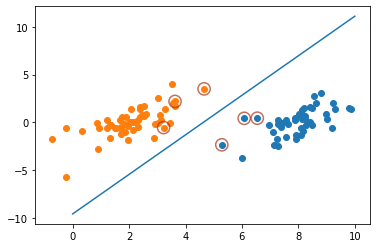

In [108]:
svmMLiA.showSimpleSMO(dataArr,labelArr, alphas, b)